## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

import warnings
warnings.filterwarnings("ignore")

In [4]:
house = pd.read_csv('https://bit.ly/2Ww3f6sPropertiesDs')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# check dataset shape
house.shape

(21613, 21)

In [6]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [7]:
house = house.drop(columns = ['id', 'date'])

In [8]:
# dropping duplicates, if any
house.duplicated().sum()
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [9]:
house.shape

(21608, 19)

In [10]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [11]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()

house_columns.remove('price')

len(house_columns)

18

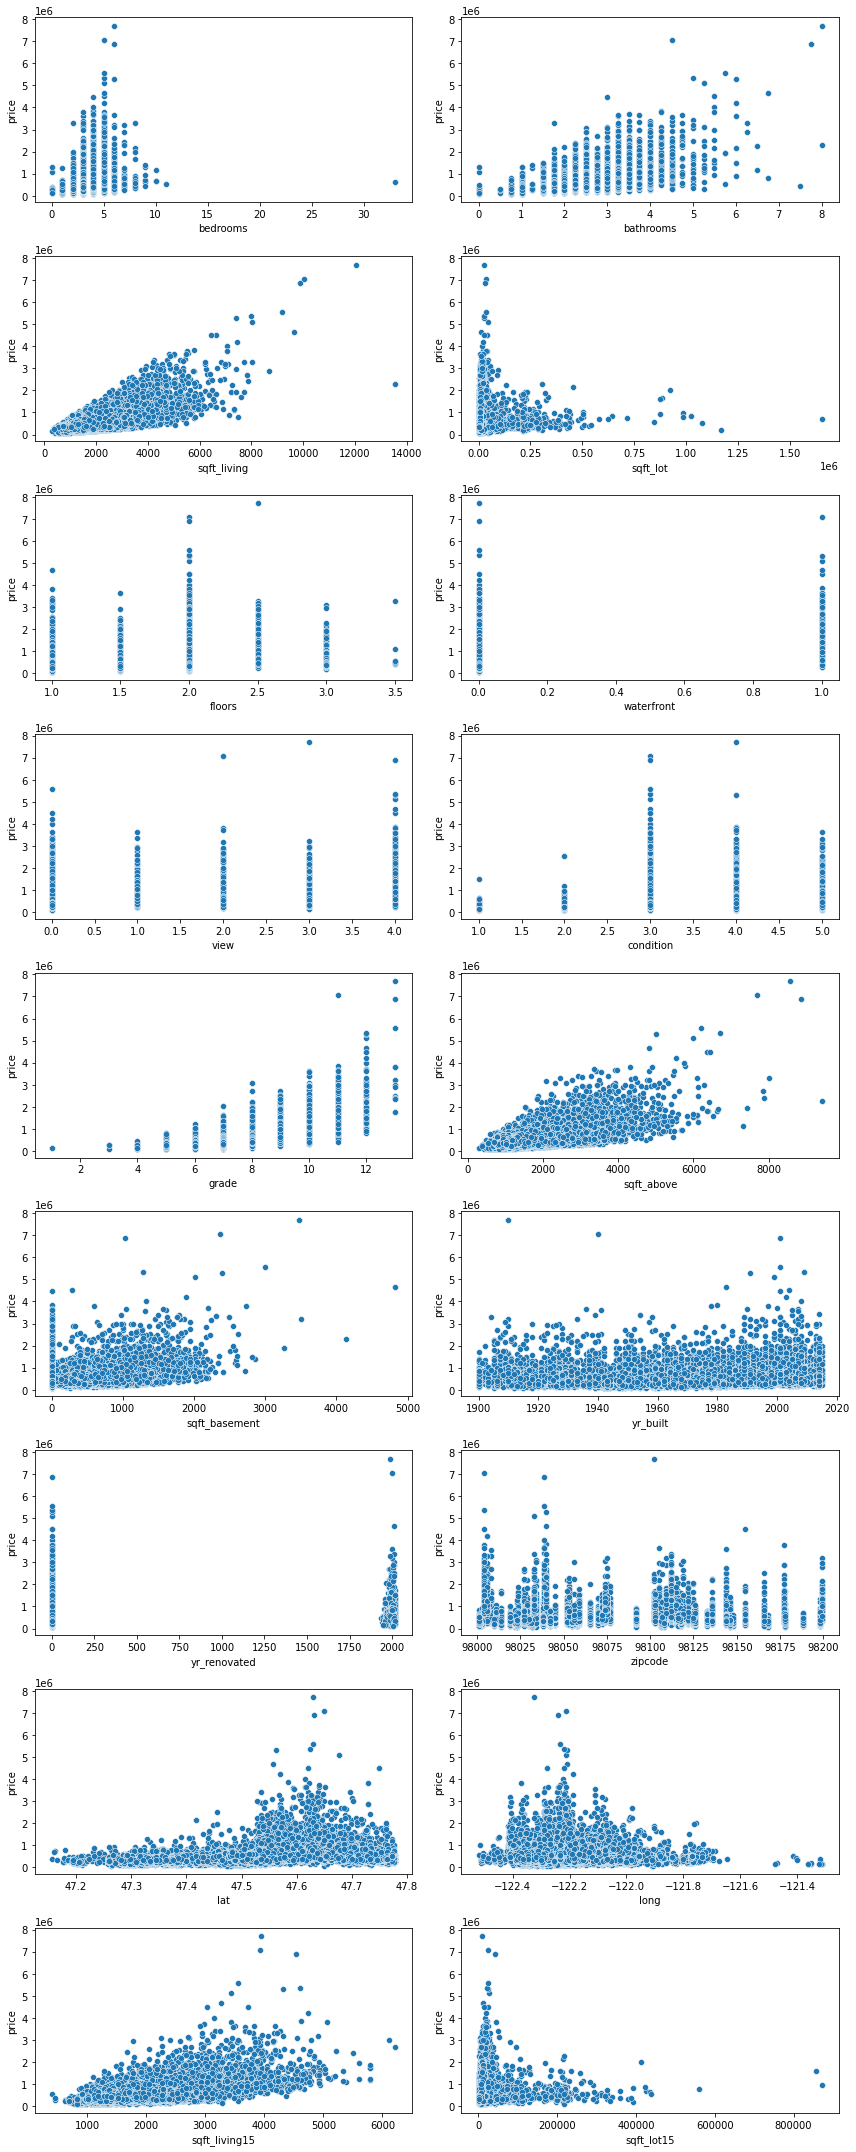

In [12]:
# creating scatterplots to observe the relationship between price and the variables
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

What have you noticed? 
> Positive Linear relationship exists between price and sqft_living15,sqft_above,sqft_living,sqft_basement



What will you do next?

In [13]:
house_columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [14]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 3.2 Checking for outliers

bedrooms


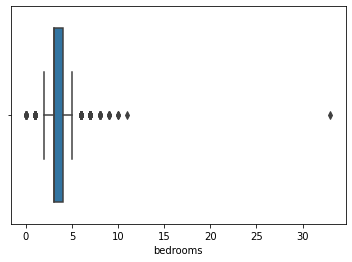

bathrooms


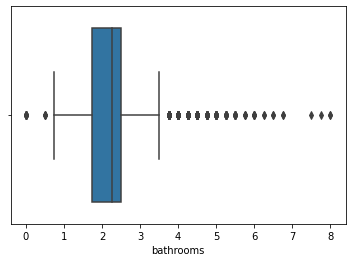

sqft_living


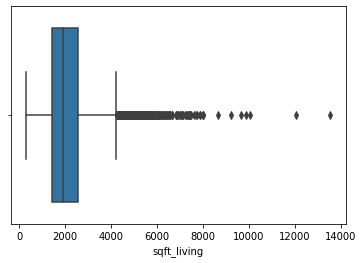

sqft_lot


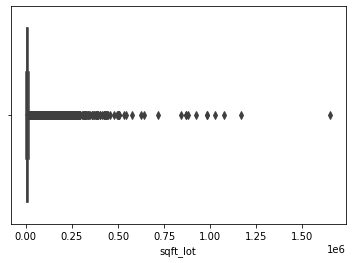

floors


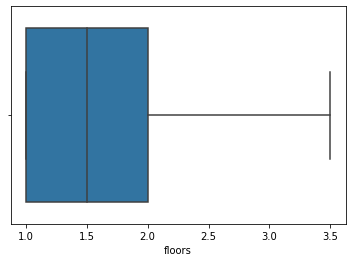

waterfront


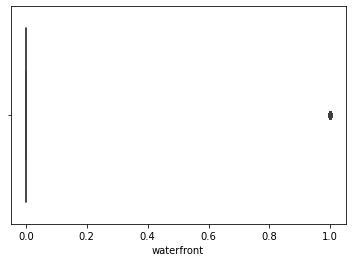

view


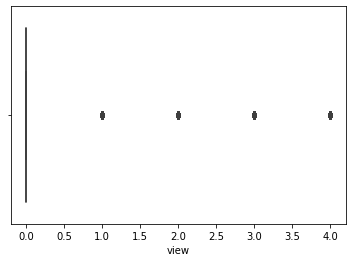

condition


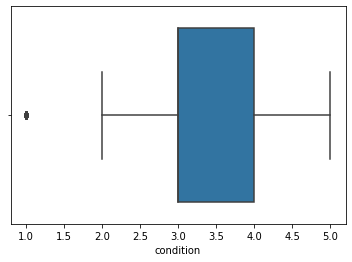

grade


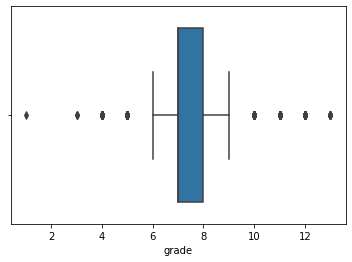

sqft_above


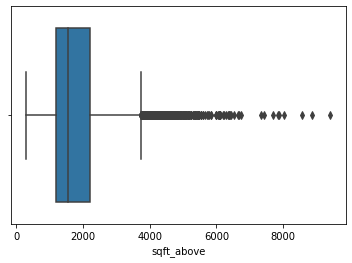

sqft_basement


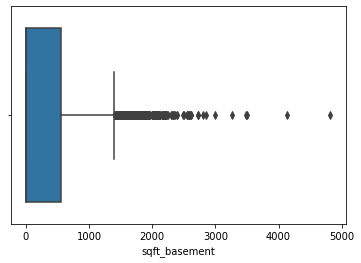

yr_built


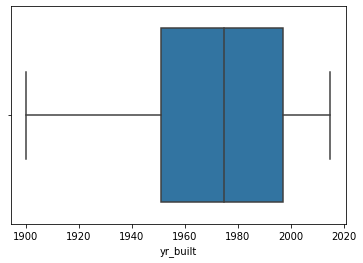

yr_renovated


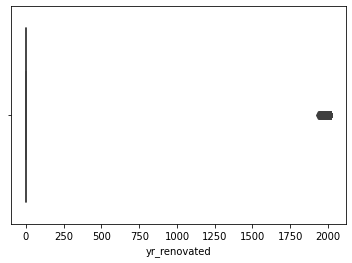

zipcode


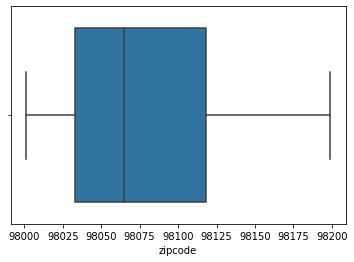

lat


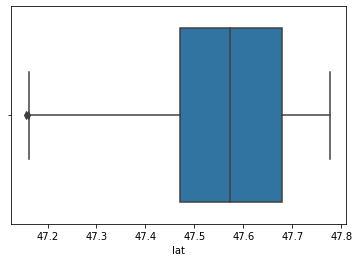

long


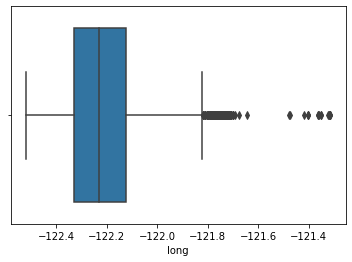

sqft_living15


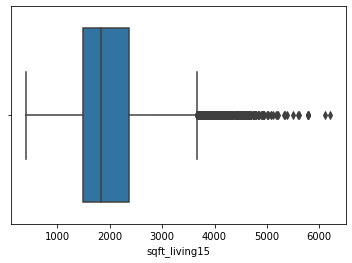

sqft_lot15


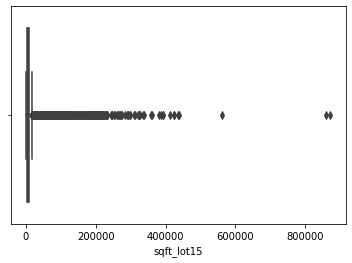

In [15]:
# create a boxplot to visualize the outliers
for i in house.iloc[0:,1:].columns:
    sns.boxplot(house[i],data=house)
    print(i)
    plt.show()

What observations can you make? 
>The number of bedrooms has minimum of 0 and upto a maximum of 33.The mean and median are both 3
>sqft lot, sqft_basement, yr_renovated are highly skewed with majority of the values in Q1. Majority of houses have never been renovated thus have a value of 0
>A house either has a waterfront or not, denoted as 1 or 0 
View,Condition and Grade are ratings raging from 0-5 for View, 1-5 for Condition and 1 to 12 for Grade

What actions are you going to take next?
We will drop the outliers with more than 10 bedrooms in the code below.

In [16]:
house.query('bedrooms>10')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [17]:
house = house.drop([15870,8757])

### 3.3 Checking multicollinearity

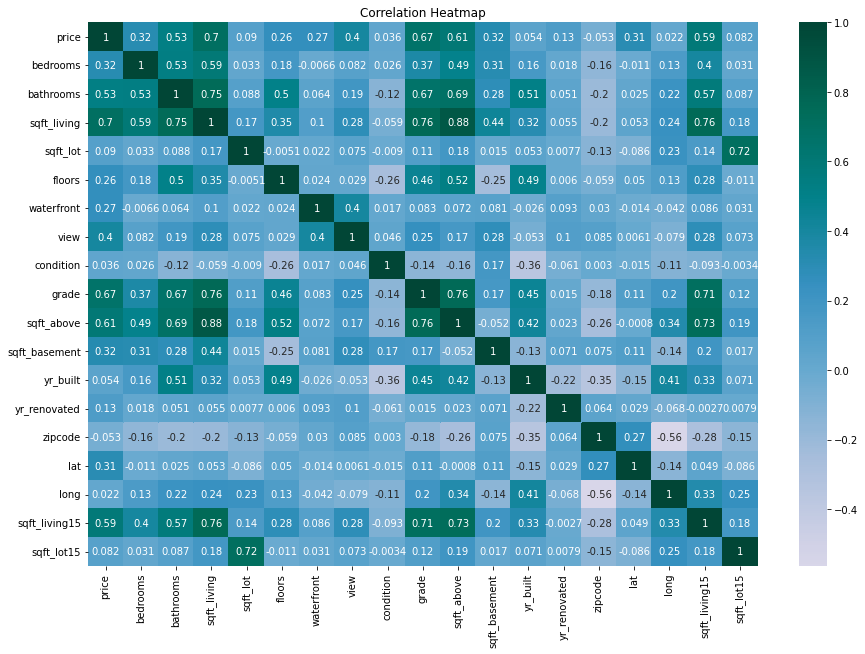

In [18]:
# create a heatmap of the correlations
# Correlation matrix
corr= house.corr()

# Plotting heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'PuBuGn')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# check VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = house
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data.sort_values('VIF', ascending=False))

# f"{num:.9f}"

          feature           VIF
3     sqft_living           inf
10     sqft_above           inf
11  sqft_basement           inf
14        zipcode  1.694481e+06
16           long  1.376902e+06
15            lat  1.592571e+05
12       yr_built  1.022356e+04
9           grade  1.610545e+02
8       condition  3.492721e+01
2       bathrooms  2.892402e+01
17  sqft_living15  2.716113e+01
1        bedrooms  2.568119e+01
5          floors  1.689576e+01
0           price  1.055370e+01
18     sqft_lot15  2.602392e+00
4        sqft_lot  2.378626e+00
7            view  1.595921e+00
6      waterfront  1.276367e+00
13   yr_renovated  1.196420e+00




> What have you noticed?  
sqft_living, sqft_above,  sqft_basement have VIF = infinity which indicates perfect multicollinearity



> What actions are you going to take next regarding this? 
we need to drop the variables causing this perfect  multicollinearity.


In [20]:
a=vif_data["VIF"].tolist()
a.sort()
a

[1.1964200541533907,
 1.2763674669102247,
 1.5959212820736102,
 2.3786255677917287,
 2.6023923615573152,
 10.553696753794235,
 16.895757203021,
 25.681193734033435,
 27.16112638579327,
 28.924024432150098,
 34.92720596561423,
 161.05452340271316,
 10223.561716964461,
 159257.11058640887,
 1376901.8959828,
 1694481.1359892837,
 inf,
 inf,
 inf]

In [21]:
house=house.drop(['sqft_living','sqft_above','sqft_basement'],axis=1)

In [22]:
house.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503


## <font color='#2F4F4F'>4. Data Modeling</font>

In [23]:
# split into features (X) and label (Y)
X= house.drop(['price'],axis=1)
y = house['price']

In [24]:
# split into 80-20 train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# fit regressor to data and make predictions
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

prediction =model.predict(X_test)



In [26]:
# evaluate RMSE and r-squared scores
from sklearn import metrics 

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R Squared:', metrics.r2_score(y_test, prediction))

RMSE: 192537.4899769296
R Squared: 0.6954189811074762


In [27]:
house['price'].mean()

540094.6754605202

In [28]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))/house['price'].mean()

0.35648840606095494

What conclusions have you drawn?
The RMSE is more than 10% of the mean of the price but has an Rsquared of 69% which means that our model is fairly accurate 

### 4.1 Test for normality and homoscedasticity

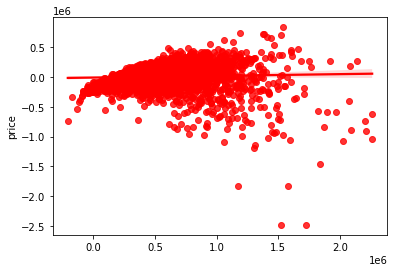

In [29]:
# # create a dataframe of residuals
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction,'Residual':prediction-y_test})
df.sample(10)

# # plotting our residuals
# # YOUR CODE HERE

residual = prediction - y_test
residual
sns.regplot(x =prediction , y = residual, data = None, scatter = True, color = 'red')

What is your interpretation of the residual plot? The residuals have a high density close to the origin and low density further away. this is an indicator that they are symmetric. The variance of the errors are concentrated around the regression line indicating homoscedasticity

In [66]:
import scipy as sp
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import bartlett

# using the scipy bartlett function to get our test result and p-value
# YOUR CODE HERE
# window=np.bartlett(42)
S1= np.array(house['price'].sample(50))
S2= np.array(house['price'].sample(100))
S3= np.array(house['price'].sample(200))

stats.bartlett(S1,S2,S3)

test_result=stats.bartlett(S1,S2,S3)[0]
p=stats.bartlett(S1,S2,S3)[1]

print('test_result:',test_result,'pvalue:',p)
# test_result


# stat, p = bartlett(S1, S2, S3)

# sp.bartlett(*house)
# computing the critical value of a chi-squared distribution
degree_of_freedom = len(prediction) - 1
prob = 1 - p
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

test_result: 13.70942163652499 pvalue: 0.0010544765268623805
Critical value: 4612.4510200017


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [67]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [39]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 225595.5052124375

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 230695.8070059485

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 239451.92848159315

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 253289.89589531827

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 268644.3299645422

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 273065.0290422742

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 290305.4497534697

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 317313.69395679166

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 345087.61314678215

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 134529.55739094008

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 135968.72401261298

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score

In [40]:
print("Ada Boosting R-squared Score:", metrics.r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(y_test, xgbr_predict))

Ada Boosting R-squared Score: 0.0215672862775379
Gradient Boosting R-squared Score: 0.8250748401714518
XG Boosting R-squared Score: 0.8440199183701522


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.